In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('input-2019.png')
target = cv2.imread('output-2019.png')

In [3]:
h, w, c = img.shape
img_size = (h, w)

In [4]:
# 評価関数
def eval_score(rotation, zoom_rate, x, y):
    rot_matrix = cv2.getRotationMatrix2D((img_size[0]/2.0+x, img_size[1]/2.0+y), rotation, zoom_rate)
    img_transformed = cv2.warpAffine(img, rot_matrix, img_size, flags=cv2.INTER_NEAREST, borderValue=(255, 255, 255))
    score = -np.sum(np.abs(img_transformed - target), dtype='int64')
    return score

In [5]:
import math

# 焼きなまし法
rotation = 17.965227252834065 # 回転角度(の初期値)
zoom_rate = 1.2477622730606521 # 拡大率(の初期値)
x = 0.0 # 回転の中心座標(X座標)(の初期値)
y = 0.0 # 回転の中心座標(Y座標)(の初期値)

rotation_last = 0.0 # 前回の回転角度
rotation_best = 0.0 # 最良の回転角度
zoom_rate_last = 1.0 # 前回の回転角度
zoom_rate_best = 1.0 # 最良の回転角度
x_last = 0.0 # 前回の回転の中心座標(X座標)
x_best = 0.0 # 最良の回転の中心座標(X座標)
y_last = 0.0 # 前回の回転の中心座標(Y座標)
y_best = 0.0 # 最良の回転の中心座標(Y座標)

score = eval_score(rotation, zoom_rate, x, y) # 現在の評価値
score_last = score # 前回の評価値
score_best = score # 最良の評価値

rotation_sd = 0.001 # 回転角度の変化量を正規分布で決める際の標準偏差
zoom_rate_sd = 0.00001 # 拡大率の変化量を正規分布で決める際の標準偏差
x_sd = 0.001 # X座標の移動量の変化量を正規分布で決める際の標準偏差
y_sd = 0.001 # Y座標の移動量の変化量を正規分布で決める際の標準偏差

temperature = img_size[0] * img_size[1] * 255 * 0.01 # 温度(の初期値)
decay_rate = 0.0001 # 冷却率
iter_limit = 100000 # 最大繰り返し回数

history = [] # 評価値とその時点でのパラメータの履歴

# 以下、本体
for i in range(iter_limit):
    if i % 1000 == 0: print(f'i = {i}: rotation = {rotation:.8f}, zoom_rate = {zoom_rate:.8f}, x = {x:.8f}, y = {y:.8f}, score = {score}, temperature = {temperature:.6e}')
    history.append([rotation, zoom_rate, x, y, score, temperature])
    rotation_delta = np.random.normal(0.0, rotation_sd)
    zoom_rate_delta = np.random.normal(0.0, zoom_rate_sd)
    x_delta = np.random.normal(0.0, x_sd)
    y_delta = np.random.normal(0.0, y_sd)
    rotation = rotation + rotation_delta
    zoom_rate = zoom_rate + zoom_rate_delta
    x = x + x_delta
    y = y + y_delta
    score = eval_score(rotation, zoom_rate, x, y)
    # 遷移を行う
    if score > score_best:
        rotation_best = rotation
        zoom_rate_best = zoom_rate
        x_best = x
        y_best = y
        score_best = score
    elif np.random.uniform() > math.exp((score - score_last) / temperature):
        rotation = rotation_last
        zoom_rate = zoom_rate_last
        x = x_last
        y = y_last
        score = score_last
    rotation_last = rotation
    zoom_rate_last = zoom_rate
    x_last = x
    y_last = y
    score_last = score
    temperature *= (1.0 - decay_rate)
history.append([rotation, zoom_rate, x, y, score, temperature])

i = 0: rotation = 17.96522725, zoom_rate = 1.24776227, x = 0.00000000, y = 0.00000000, score = -6437508, temperature = 2.301375e+06
i = 1000: rotation = 17.95799050, zoom_rate = 1.24816398, x = -0.00324471, y = 0.01510582, score = -6600116, temperature = 2.082360e+06
i = 2000: rotation = 17.92127343, zoom_rate = 1.24848079, x = 0.01447675, y = -0.01110547, score = -6781959, temperature = 1.884188e+06
i = 3000: rotation = 17.89818140, zoom_rate = 1.24810296, x = -0.04410140, y = -0.00676467, score = -7114049, temperature = 1.704875e+06
i = 4000: rotation = 17.87599163, zoom_rate = 1.24787670, x = -0.03650902, y = 0.01743879, score = -7613824, temperature = 1.542627e+06
i = 5000: rotation = 17.87161307, zoom_rate = 1.24819476, x = -0.03074976, y = 0.02239992, score = -7650039, temperature = 1.395820e+06
i = 6000: rotation = 17.80499601, zoom_rate = 1.24768332, x = -0.07392039, y = 0.02830229, score = -9216695, temperature = 1.262983e+06
i = 7000: rotation = 17.84449230, zoom_rate = 1.247

i = 60000: rotation = 17.99987783, zoom_rate = 1.24998873, x = 0.03381651, y = -2.05282331, score = -30048, temperature = 5.702827e+03
i = 61000: rotation = 18.00008428, zoom_rate = 1.25000341, x = 0.02989229, y = -2.06361532, score = -27249, temperature = 5.160106e+03
i = 62000: rotation = 17.99990881, zoom_rate = 1.25000126, x = 0.03247712, y = -2.05595633, score = -15852, temperature = 4.669033e+03
i = 63000: rotation = 18.00003146, zoom_rate = 1.24999912, x = 0.03579690, y = -2.05556539, score = -10760, temperature = 4.224695e+03
i = 64000: rotation = 17.99994590, zoom_rate = 1.25000218, x = 0.03348365, y = -2.05687591, score = -13593, temperature = 3.822643e+03
i = 65000: rotation = 17.99959305, zoom_rate = 1.25000566, x = 0.03377527, y = -2.06196623, score = -37952, temperature = 3.458853e+03
i = 66000: rotation = 17.99981096, zoom_rate = 1.25000226, x = 0.03702049, y = -2.05763456, score = -13144, temperature = 3.129684e+03
i = 67000: rotation = 17.99991349, zoom_rate = 1.250000

In [6]:
print(f'Best result:')
print(f'Rotation angle           = {rotation_best}')
print(f'Zoom rate                = {zoom_rate_best}')
print(f'Rotation center (X-axis) = {x_best}')
print(f'Rotation center (Y-axis) = {y_best}')
print(f'Score                    = {score_best}')

Best result:
Rotation angle           = 18.00005383534616
Zoom rate                = 1.249999390359103
Rotation center (X-axis) = 0.034418225417649766
Rotation center (Y-axis) = -2.0579428084867732
Score                    = -4074


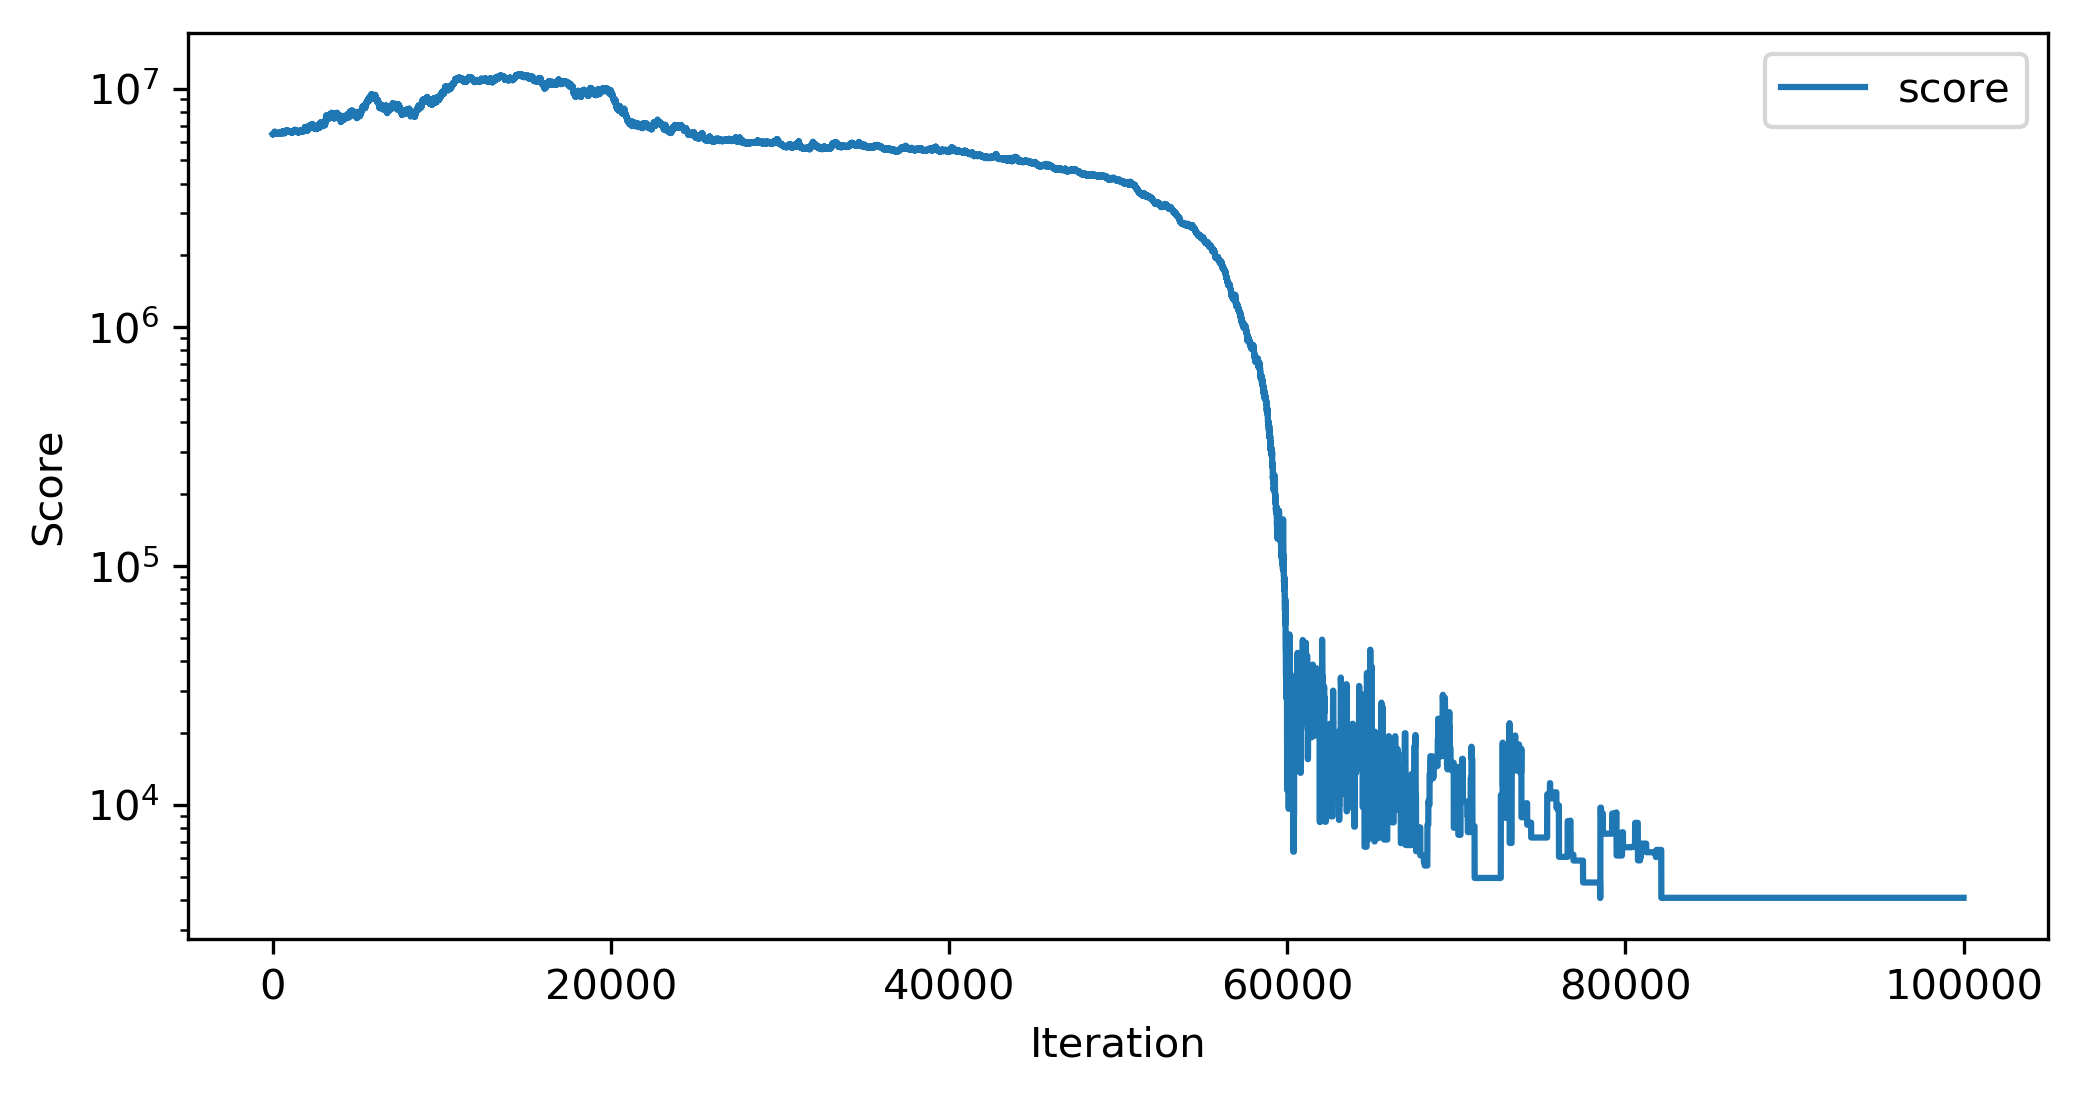

In [7]:
score_list = []
for d in history:
    score_list.append(-d[4])
f = plt.figure(figsize=(8, 4), dpi=300)
f.add_subplot(1, 1, 1)
plt.plot(np.linspace(0, len(history), len(history)), score_list, label='score')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.legend()
plt.savefig('score_with_shift.png')
plt.show()

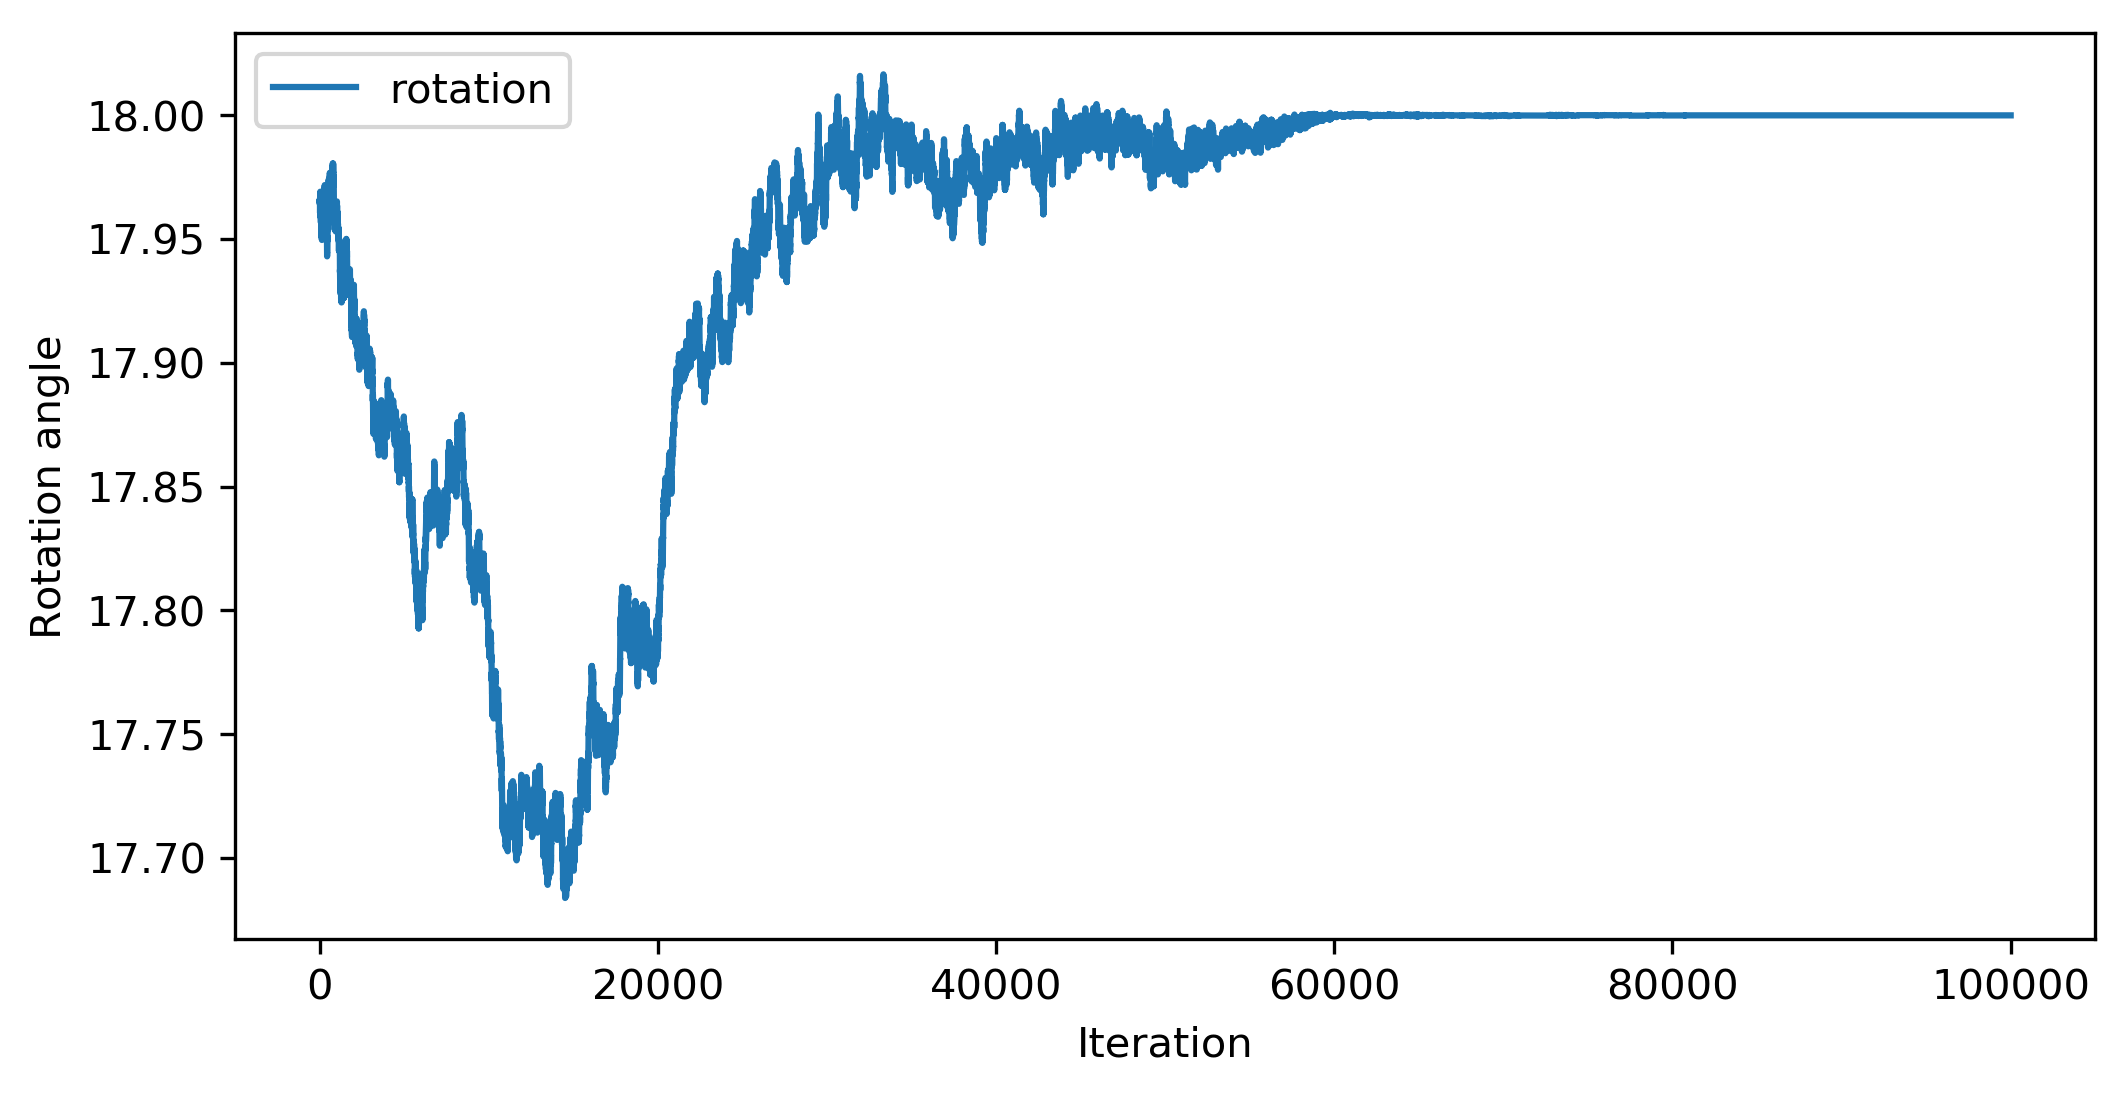

In [8]:
rotation_list = []
for d in history:
    rotation_list.append(d[0])
f = plt.figure(figsize=(8, 4), dpi=300)
f.add_subplot(1, 1, 1)
plt.plot(np.linspace(0, len(history), len(history)), rotation_list, label='rotation')
plt.xlabel('Iteration')
plt.ylabel('Rotation angle')
plt.legend()
plt.savefig('rotation_angle_with_shift.png')
plt.show()

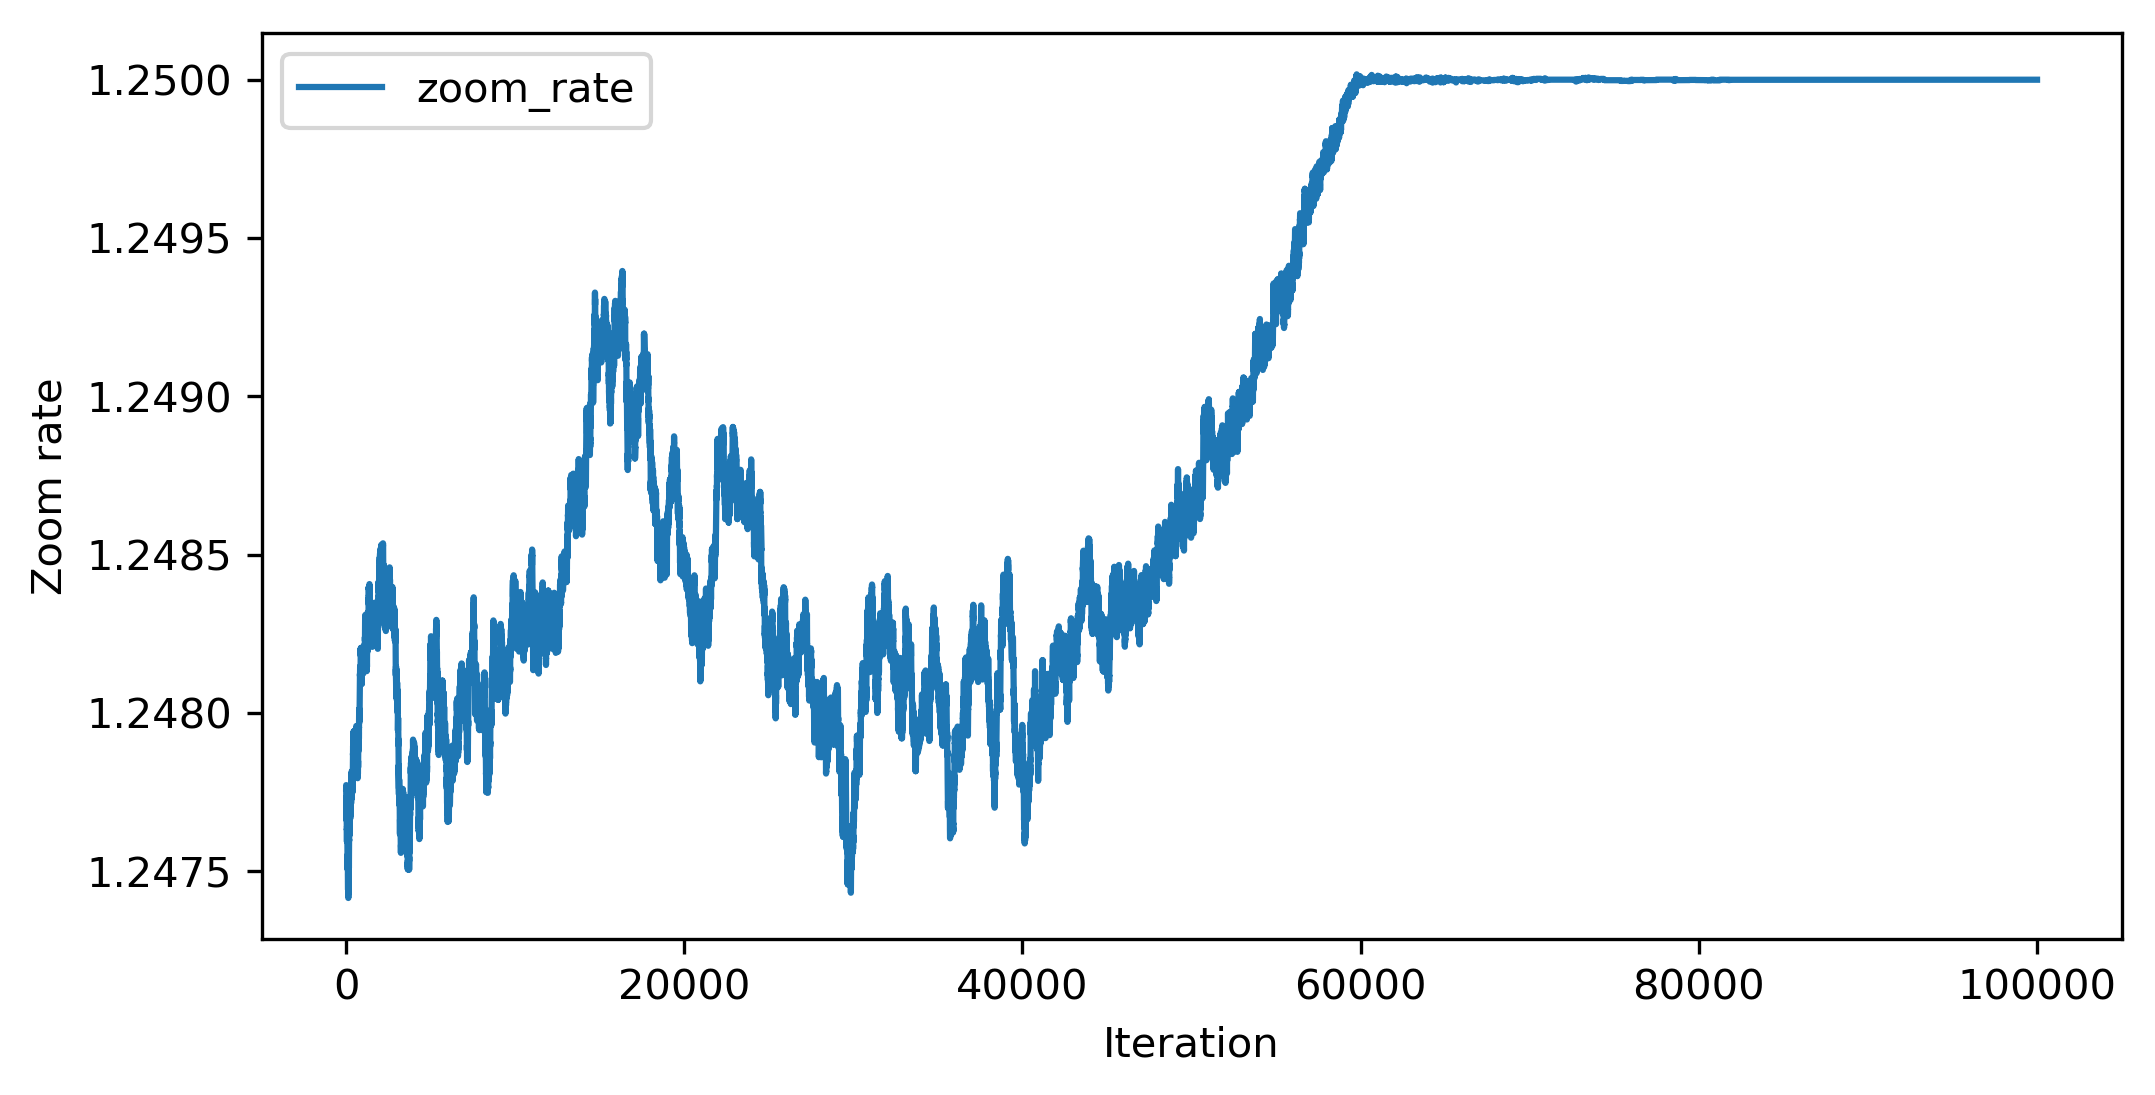

In [9]:
zoom_rate_list = []
for d in history:
    zoom_rate_list.append(d[1])
f = plt.figure(figsize=(8, 4), dpi=300)
f.add_subplot(1, 1, 1)
plt.plot(np.linspace(0, len(history), len(history)), zoom_rate_list, label='zoom_rate')
plt.xlabel('Iteration')
plt.ylabel('Zoom rate')
plt.legend()
plt.savefig('zoom_rate_with_shift.png')
plt.show()

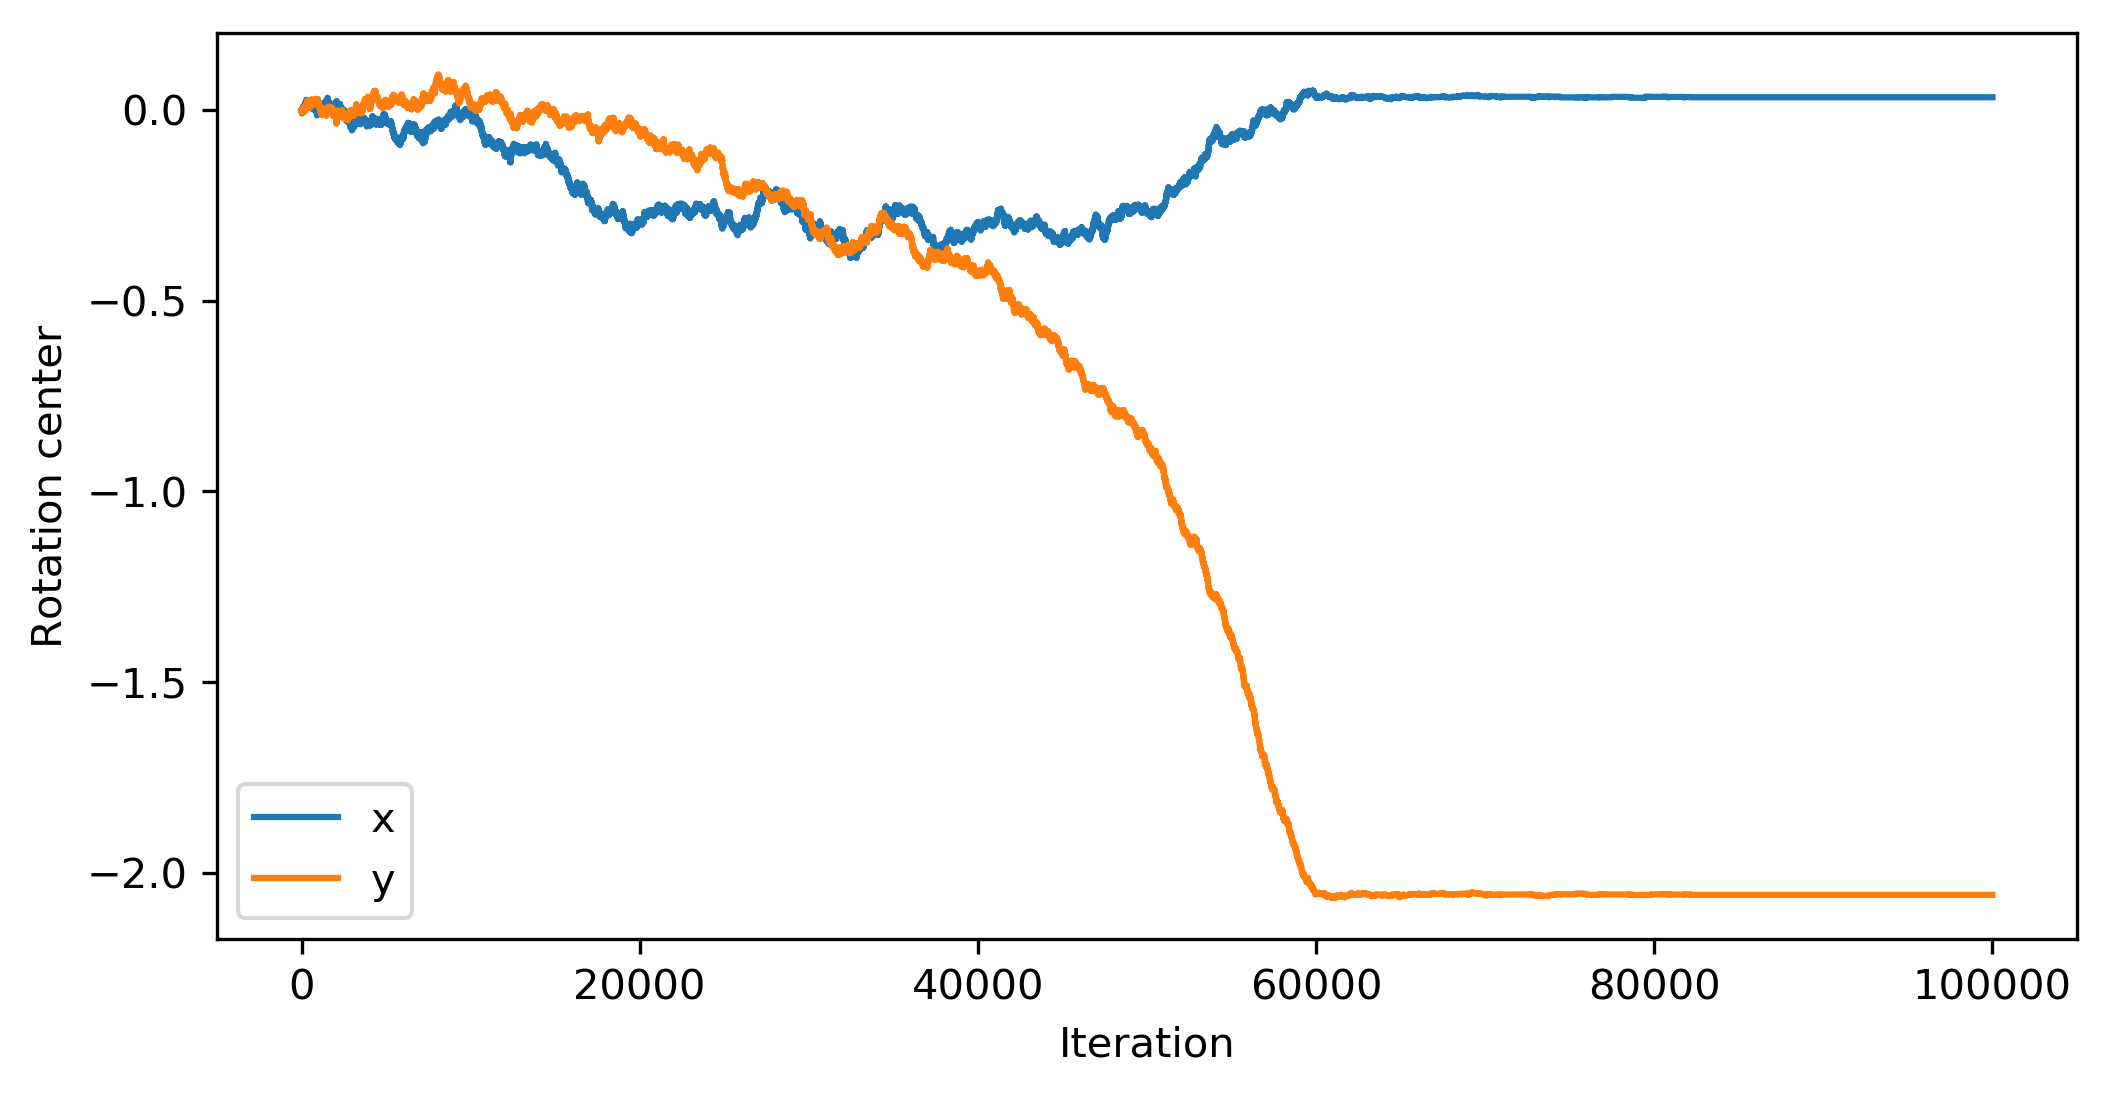

In [10]:
x_list = []
y_list = []
for d in history:
    x_list.append(d[2])
    y_list.append(d[3])
f = plt.figure(figsize=(8, 4), dpi=300)
f.add_subplot(1, 1, 1)
plt.plot(np.linspace(0, len(history), len(history)), x_list, label='x')
plt.plot(np.linspace(0, len(history), len(history)), y_list, label='y')
plt.xlabel('Iteration')
plt.ylabel('Rotation center')
plt.legend()
plt.savefig('rotation_center_with_shift.png')
plt.show()

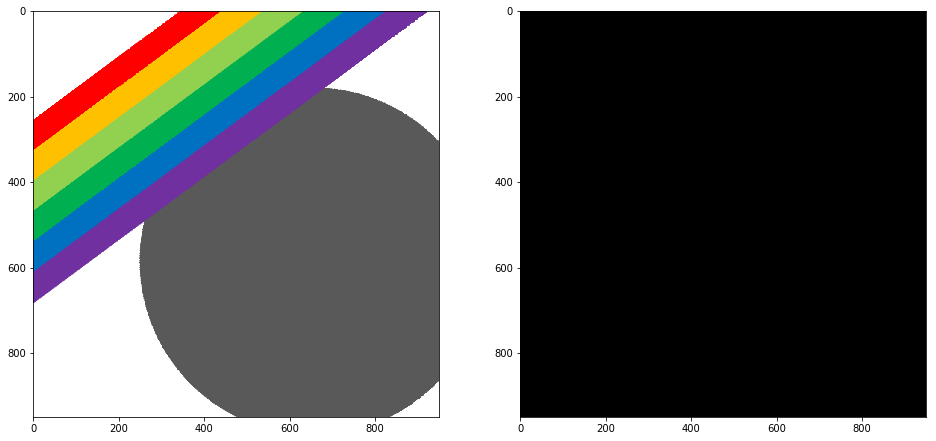

In [11]:
rot_matrix = cv2.getRotationMatrix2D(((img_size[0])/2.0+x_best, (img_size[1])/2.0+y_best), rotation_best, zoom_rate_best)
f = plt.figure(figsize=(16, 8))
f.add_subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.warpAffine(img, rot_matrix, img_size, flags=cv2.INTER_NEAREST, borderValue=(255, 255, 255)), cv2.COLOR_BGR2RGB))
f.add_subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(np.abs(cv2.warpAffine(img, rot_matrix, img_size, flags=cv2.INTER_NEAREST) - target), cv2.COLOR_BGR2RGB))
plt.show()

In [12]:
rot_matrix = cv2.getRotationMatrix2D(((img_size[0])/2.0+x_best, (img_size[1])/2.0+y_best), rotation_best, zoom_rate_best)
img_best = cv2.warpAffine(img, rot_matrix, img_size, flags=cv2.INTER_NEAREST, borderValue=(255, 255, 255))
img_difference = np.abs(img_best - target)
cv2.imwrite('img_with_shift_best.png', img_best)
cv2.imwrite('img_with_shift_difference.png', img_difference)

True